In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 128.", name="epoch 50")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
1/5 [=====>........................] - ETA: 6s - loss: 1.3884 - mae: 1.1075

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 7s 1s/step - loss: 1.3247 - mae: 1.0652 - val_loss: 0.9781 - val_mae: 0.9008
Epoch 2/50
4/5 [=======================>......] - ETA: 0s - loss: 0.8069 - mae: 0.7963

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 967ms/step - loss: 0.7670 - mae: 0.7675 - val_loss: 0.3308 - val_mae: 0.4576
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.3023 - mae: 0.4424

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.3023 - mae: 0.4424 - val_loss: 0.2386 - val_mae: 0.4003
Epoch 4/50
3/5 [=================>............] - ETA: 0s - loss: 0.2208 - mae: 0.3866

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 979ms/step - loss: 0.2071 - mae: 0.3742 - val_loss: 0.1782 - val_mae: 0.3500
Epoch 5/50
5/5 [==============================] - 0s 57ms/step - loss: 0.1797 - mae: 0.3475 - val_loss: 0.1820 - val_mae: 0.3519
Epoch 6/50
1/5 [=====>........................] - ETA: 0s - loss: 0.2002 - mae: 0.3674

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.1750 - mae: 0.3416 - val_loss: 0.1666 - val_mae: 0.3364
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.1600 - mae: 0.3302

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 965ms/step - loss: 0.1600 - mae: 0.3302 - val_loss: 0.1446 - val_mae: 0.3147
Epoch 8/50
4/5 [=======================>......] - ETA: 0s - loss: 0.1455 - mae: 0.3149

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.1408 - mae: 0.3089 - val_loss: 0.1239 - val_mae: 0.2905
Epoch 9/50
4/5 [=======================>......] - ETA: 0s - loss: 0.1192 - mae: 0.2810

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.1174 - mae: 0.2790 - val_loss: 0.1014 - val_mae: 0.2602
Epoch 10/50
4/5 [=======================>......] - ETA: 0s - loss: 0.0913 - mae: 0.2423

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0883 - mae: 0.2373 - val_loss: 0.0662 - val_mae: 0.2016
Epoch 11/50
5/5 [==============================] - 0s 72ms/step - loss: 0.0698 - mae: 0.2070 - val_loss: 0.0705 - val_mae: 0.2133
Epoch 12/50
5/5 [==============================] - 0s 52ms/step - loss: 0.0730 - mae: 0.2099 - val_loss: 0.0736 - val_mae: 0.2200
Epoch 13/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0860 - mae: 0.2384

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0702 - mae: 0.2075 - val_loss: 0.0619 - val_mae: 0.1936
Epoch 14/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0645 - mae: 0.1975 - val_loss: 0.0641 - val_mae: 0.1958
Epoch 15/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0628 - mae: 0.1939

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 969ms/step - loss: 0.0616 - mae: 0.1925 - val_loss: 0.0581 - val_mae: 0.1856
Epoch 16/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0599 - mae: 0.1877 - val_loss: 0.0593 - val_mae: 0.1906
Epoch 17/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0598 - mae: 0.1946

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0598 - mae: 0.1894 - val_loss: 0.0575 - val_mae: 0.1851
Epoch 18/50
5/5 [==============================] - 0s 88ms/step - loss: 0.0581 - mae: 0.1858 - val_loss: 0.0594 - val_mae: 0.1860
Epoch 19/50
5/5 [==============================] - 0s 47ms/step - loss: 0.0584 - mae: 0.1859 - val_loss: 0.0576 - val_mae: 0.1825
Epoch 20/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0602 - mae: 0.1875

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0584 - mae: 0.1856 - val_loss: 0.0566 - val_mae: 0.1824
Epoch 21/50
5/5 [==============================] - 0s 71ms/step - loss: 0.0571 - mae: 0.1825 - val_loss: 0.0577 - val_mae: 0.1849
Epoch 22/50
5/5 [==============================] - 0s 51ms/step - loss: 0.0576 - mae: 0.1838 - val_loss: 0.0572 - val_mae: 0.1828
Epoch 23/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0567 - mae: 0.1817 - val_loss: 0.0570 - val_mae: 0.1821
Epoch 24/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0540 - mae: 0.1738

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0567 - mae: 0.1811 - val_loss: 0.0561 - val_mae: 0.1816
Epoch 25/50
5/5 [==============================] - 0s 88ms/step - loss: 0.0563 - mae: 0.1805 - val_loss: 0.0562 - val_mae: 0.1814
Epoch 26/50
5/5 [==============================] - 0s 56ms/step - loss: 0.0564 - mae: 0.1810 - val_loss: 0.0564 - val_mae: 0.1813
Epoch 27/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0563 - mae: 0.1808 - val_loss: 0.0563 - val_mae: 0.1807
Epoch 28/50
5/5 [==============================] - 0s 44ms/step - loss: 0.0564 - mae: 0.1810 - val_loss: 0.0569 - val_mae: 0.1815
Epoch 29/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0563 - mae: 0.1808 - val_loss: 0.0569 - val_mae: 0.1825
Epoch 30/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0563 - mae: 0.1810 - val_loss: 0.0581 - val_mae: 0.1835
Epoch 31/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0541 - mae: 0.1793

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 899ms/step - loss: 0.0567 - mae: 0.1815 - val_loss: 0.0558 - val_mae: 0.1804
Epoch 32/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0574 - mae: 0.1825 - val_loss: 0.0559 - val_mae: 0.1806
Epoch 33/50
5/5 [==============================] - 0s 27ms/step - loss: 0.0566 - mae: 0.1812 - val_loss: 0.0560 - val_mae: 0.1809
Epoch 34/50
5/5 [==============================] - 0s 25ms/step - loss: 0.0561 - mae: 0.1806 - val_loss: 0.0565 - val_mae: 0.1807
Epoch 35/50
5/5 [==============================] - 0s 24ms/step - loss: 0.0560 - mae: 0.1803 - val_loss: 0.0569 - val_mae: 0.1813
Epoch 36/50
5/5 [==============================] - 0s 25ms/step - loss: 0.0561 - mae: 0.1807 - val_loss: 0.0564 - val_mae: 0.1813
Epoch 37/50
5/5 [==============================] - 0s 27ms/step - loss: 0.0558 - mae: 0.1802 - val_loss: 0.0561 - val_mae: 0.1804
Epoch 38/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0515 - mae: 0.1714

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0555 - mae: 0.1793 - val_loss: 0.0557 - val_mae: 0.1798
Epoch 39/50
5/5 [==============================] - 0s 64ms/step - loss: 0.0557 - mae: 0.1797 - val_loss: 0.0559 - val_mae: 0.1797
Epoch 40/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0595 - mae: 0.1840

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0554 - mae: 0.1790 - val_loss: 0.0556 - val_mae: 0.1801
Epoch 41/50
5/5 [==============================] - 0s 67ms/step - loss: 0.0557 - mae: 0.1799 - val_loss: 0.0563 - val_mae: 0.1819
Epoch 42/50
5/5 [==============================] - 0s 52ms/step - loss: 0.0557 - mae: 0.1800 - val_loss: 0.0564 - val_mae: 0.1817
Epoch 43/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0559 - mae: 0.1807 - val_loss: 0.0570 - val_mae: 0.1834
Epoch 44/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0563 - mae: 0.1810 - val_loss: 0.0560 - val_mae: 0.1803
Epoch 45/50
5/5 [==============================] - 0s 30ms/step - loss: 0.0555 - mae: 0.1795 - val_loss: 0.0562 - val_mae: 0.1820
Epoch 46/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0554 - mae: 0.1802 - val_loss: 0.0561 - val_mae: 0.1823
Epoch 47/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0556 - mae: 0.1799 - val_lo

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153623-29b8u8nt\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0556 - mae: 0.1802 - val_loss: 0.0554 - val_mae: 0.1797
Epoch 49/50
5/5 [==============================] - 0s 70ms/step - loss: 0.0550 - mae: 0.1787 - val_loss: 0.0560 - val_mae: 0.1799
Epoch 50/50
5/5 [==============================] - 0s 55ms/step - loss: 0.0550 - mae: 0.1788 - val_loss: 0.0561 - val_mae: 0.1822


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 201ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.6528561, 1.6486326, 1.6127726, 1.6365076, 1.6687458, 1.6884848,
        1.7751844, 1.7628698, 1.8067163, 1.8395668, 1.7961708, 1.8043766,
        1.7590363, 1.7642772, 1.800604 , 1.7675607, 1.7546221, 1.7362021,
        1.8663293, 1.8363879, 1.8828253, 1.906934 , 1.9693793, 1.879482 ,
        1.8638271]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

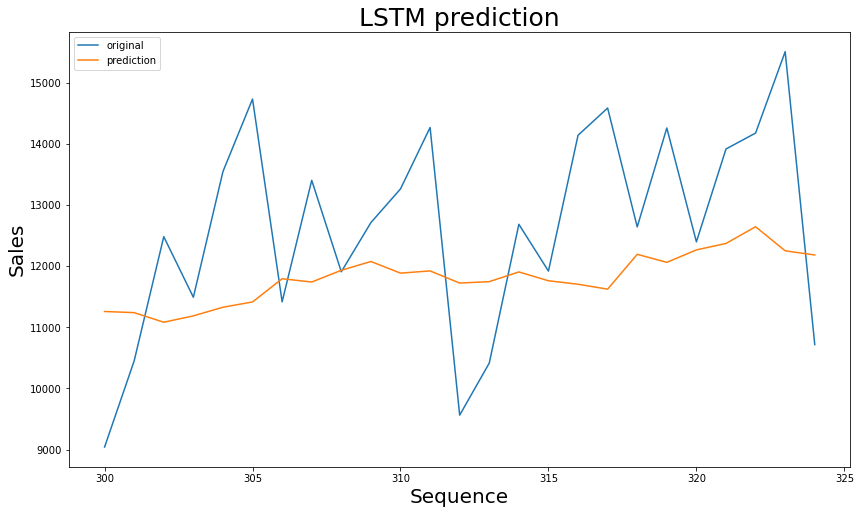

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 15ms/step - loss: 0.1638 - mae: 0.3386


[0.16379104554653168, 0.33859360218048096]